<a href="https://colab.research.google.com/github/ajayn3300/NYC-_Taxi_Trip_Time-Prediction---Regression/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [96]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries and Data

In [97]:
# importing necessary libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [98]:
# loading data
data=pd.read_csv('/content/drive/MyDrive/NYC Taxi Data.csv')

In [99]:
# data sample
data.sample(3)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1038885,id2227562,1,2016-04-24 20:57:03,2016-04-24 21:04:50,1,-73.993614,40.757252,-73.978828,40.745872,N,467
56799,id1110957,2,2016-01-12 09:37:58,2016-01-12 09:51:18,1,-74.001602,40.737457,-73.992554,40.753620,N,800
735564,id3553545,1,2016-03-30 10:49:01,2016-03-30 11:17:44,1,-73.985886,40.743919,-73.982788,40.766933,N,1723


In [100]:
#data shape
data.shape

(1458644, 11)

In [101]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [102]:
# data description
data.describe(percentiles=[0.75,0.90,0.95])

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
90%,2.000000e+00,4.000000e+00,-7.395187e+01,4.078048e+01,-7.394722e+01,4.078488e+01,1.634000e+03
95%,2.000000e+00,5.000000e+00,-7.389158e+01,4.078839e+01,-7.392018e+01,4.079751e+01,2.104000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


      We can see  95% of trip_duration is around 2104 seconds,but the maximum is 3526282.000,same as in passenger count..

In [103]:
# total numbers  of trips
print('The total numbers of trips are {}'.format(data.id.nunique()))

The total numbers of trips are 1458644


In [104]:
# average trip duration
print(" Average no. of trip duration is :{} minutes".format(662//60))

 Average no. of trip duration is :11 minutes


# **Data Wrangling**

In [105]:
#info data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


    As we can see [pickup_datetime, dropoff_datetime] has object data type ,we need to convert it into datetime format

In [106]:
# changing into datetime 
data['dropoff_datetime']=pd.to_datetime(data['dropoff_datetime'])

data['pickup_datetime']=pd.to_datetime(data['pickup_datetime'])

In [107]:
# let;s check again
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


  **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

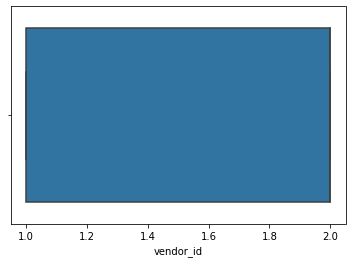

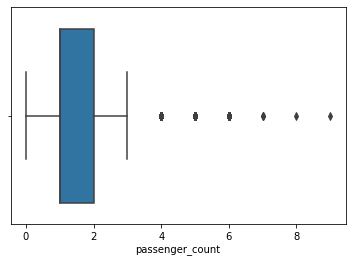

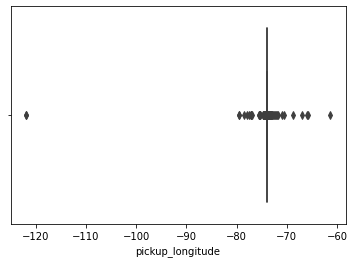

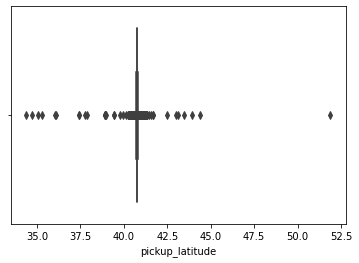

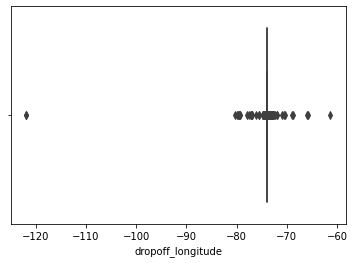

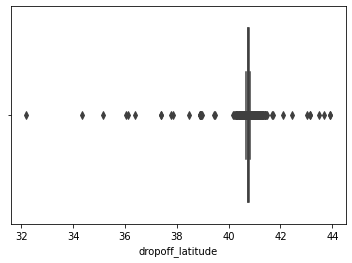

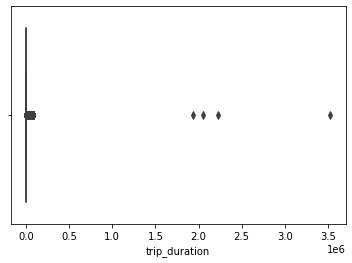

In [108]:
for i,j in enumerate(data.describe().columns):
  plt.figure(i+1)
  sns.boxplot(data[j])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


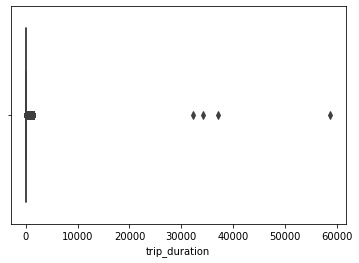

In [109]:
sns.boxplot(data['trip_duration']/60)

        We will remove outliers only from  our dependent _variable because 95% of the data is around 2104 sec and max is 3526282.
        
        Removing outlier from direction will not make any sense ,therefore we will leave these features as it is.

**NOTE :** You can rerun the upper cell for checking boxplots after removing outliers

In [110]:
#removing outliers from trip duration
data=data[data['trip_duration']<=2104]

In [111]:
#shape of data
data.shape


(1385716, 11)

In [112]:
# checking null values
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

      No null values

# ***EDA***

In [113]:
#data sample
data.sample(5)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
287254,id3008995,1,2016-02-08 13:16:23,2016-02-08 13:40:25,1,-73.962715,40.775715,-74.007462,40.725796,N,1442
1314472,id1383135,2,2016-03-02 06:24:47,2016-03-02 06:31:35,1,-73.987968,40.754280,-73.984589,40.745338,N,408
485708,id0371435,1,2016-06-24 08:15:48,2016-06-24 08:27:06,1,-73.996742,40.742191,-73.978096,40.757252,N,678
227111,id2800251,2,2016-06-14 23:39:05,2016-06-14 23:50:10,1,-73.982422,40.748581,-73.961060,40.757771,N,665
157312,id2066504,2,2016-05-22 22:27:29,2016-05-22 22:51:49,1,-73.862846,40.769157,-73.956184,40.799816,N,1460


In [114]:
# time period of the data we have 
print("The data we have is time period of year {} and of {} months".format(data.dropoff_datetime.dt.year.max(),data.dropoff_datetime.dt.month.max()))

The data we have is time period of year 2016 and of 7 months


Text(0, 0.5, 'trip_counts')

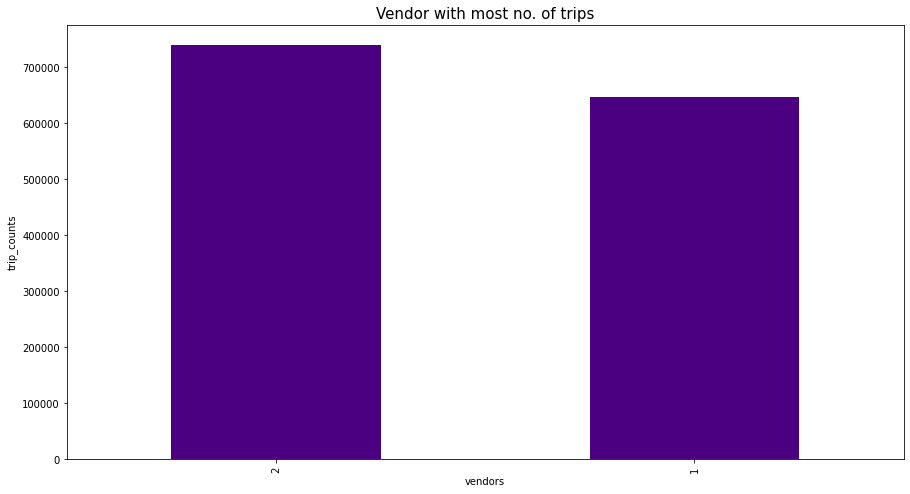

In [115]:
# vendor having most no. of trips
plt.figure(figsize=(15,8))
data.vendor_id.value_counts().plot(kind='bar',color='indigo')
plt.title("Vendor with most no. of trips",fontsize=15)
plt.xlabel('vendors')
plt.ylabel('trip_counts')

Text(0, 0.5, 'passenger_count')

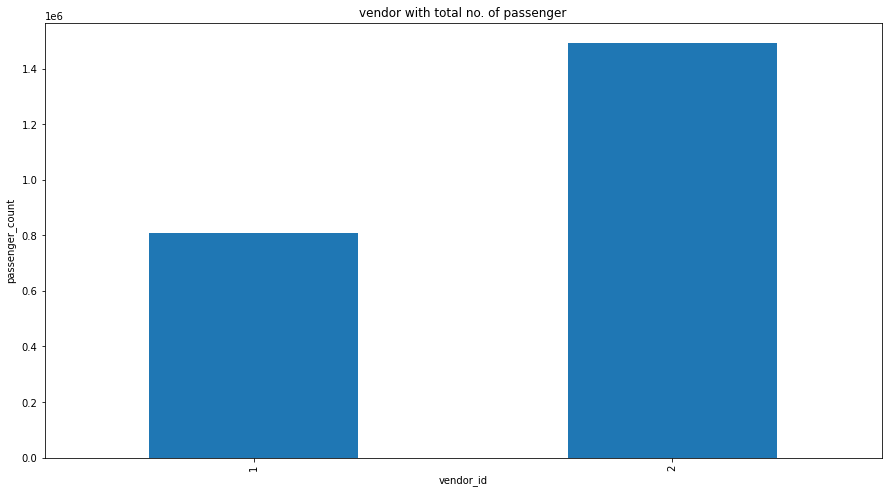

In [116]:
# vendor having most no. of passengers till date 
plt.figure(figsize=(15,8))
data.groupby('vendor_id')['passenger_count'].sum().plot(kind='bar')
plt.title('vendor with total no. of passenger')
plt.ylabel('passenger_count')

Text(0.5, 0, 'month')

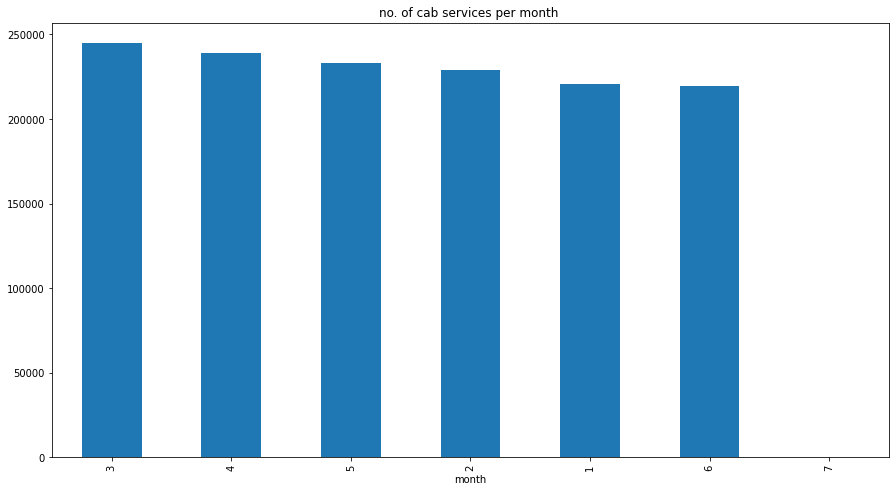

In [117]:
# In which month cab rans for most numbers times
plt.figure(figsize=(15,8))
data['dropoff_datetime'].dt.month.value_counts().plot(kind='bar')
plt.title('no. of cab services per month ')
plt.xlabel('month')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


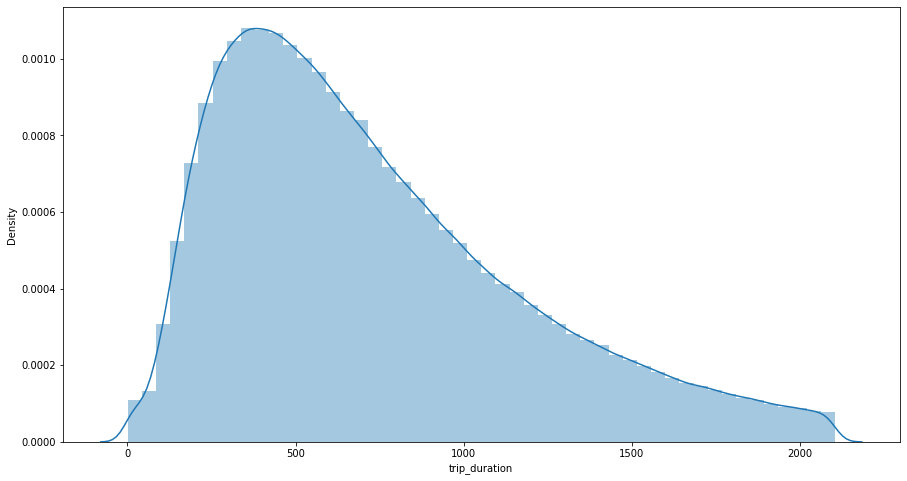

In [118]:
# Let's plot our y variable 
plt.figure(figsize=(15,8))
sns.distplot(data['trip_duration'])

  Graph is little positively skewed ,square_root transformation will do better 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


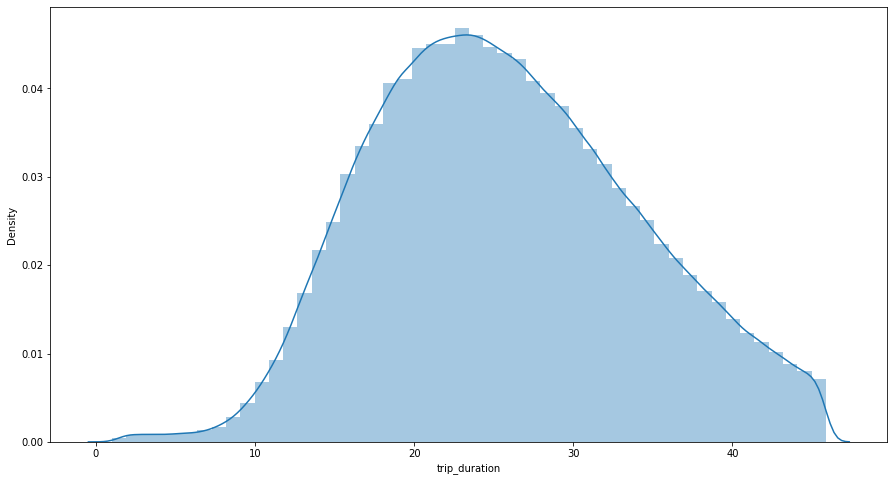

In [119]:
# sqrt transformation
plt.figure(figsize=(15,8))
sns.distplot(np.sqrt(data.trip_duration))


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

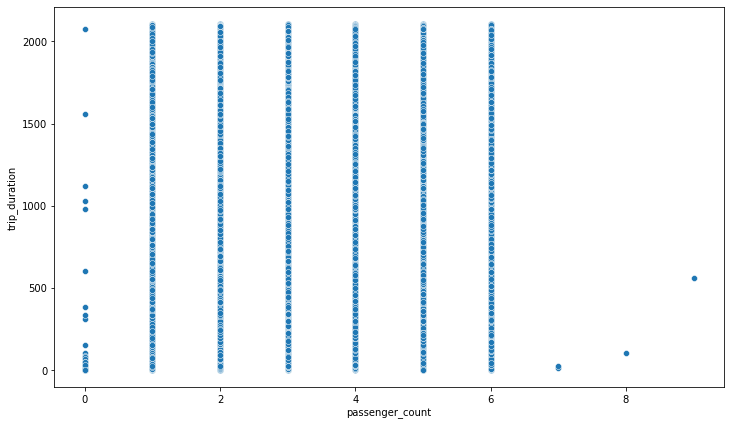

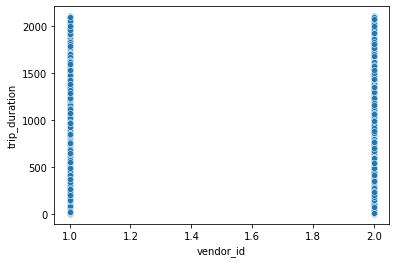

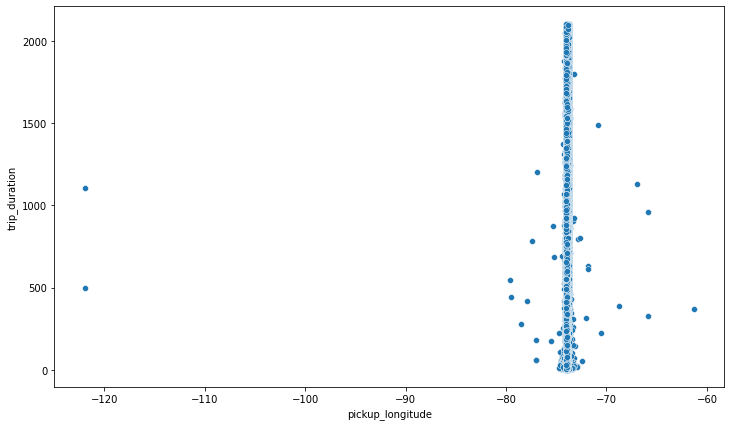

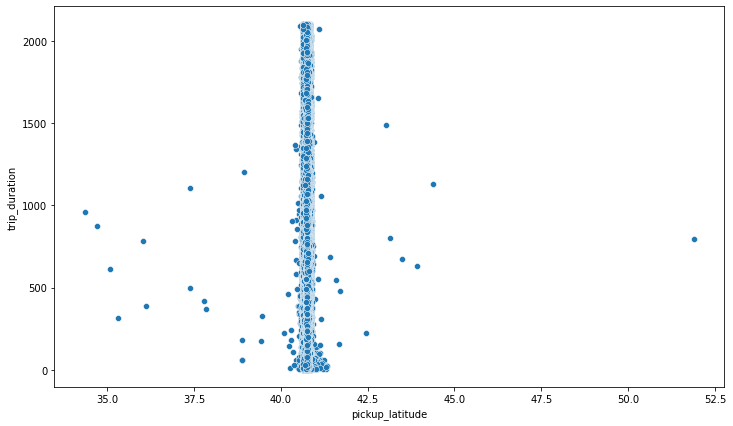

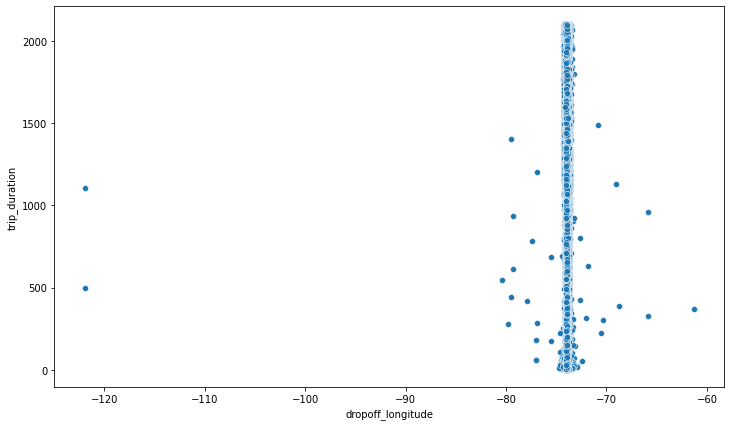

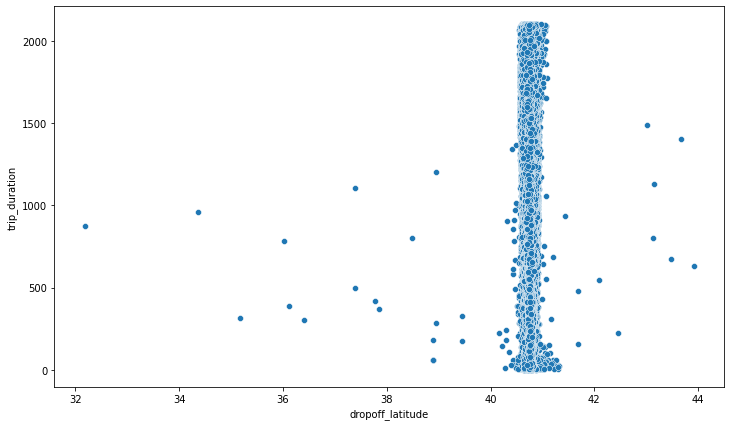

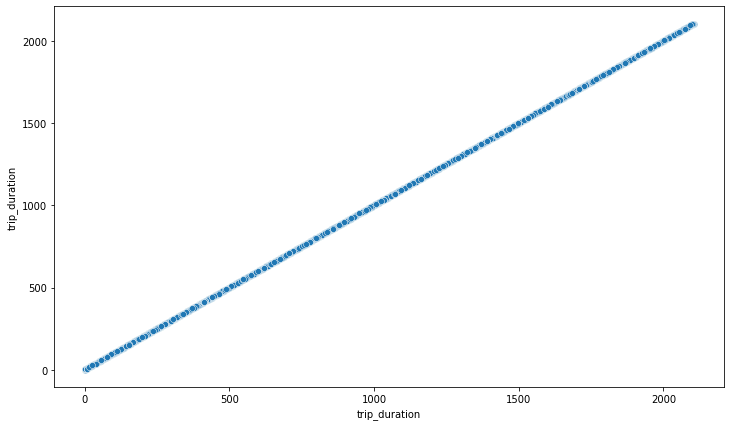

<Figure size 864x504 with 0 Axes>

In [120]:
#Let's plot relationship between dependent and independent
for i ,j in enumerate(data.describe().columns):
  plt.figure(figsize=(12,7))
  plt.figure(i)
  sns.scatterplot(data[j],data['trip_duration'])

# **Feature Engineering**

In [122]:
# extracting total dropoff seconds and total pickup seconds
data['dropoff_seconds']=data['dropoff_datetime'].apply(lambda  x:x.timestamp())
data['pickup_seconds']=data['pickup_datetime'].apply(lambda  x:x.timestamp())

In [124]:
# Let's check our dataframe
data.head(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,dropoff_seconds,pickup_seconds
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.457977e+09,1.457976e+09
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.465693e+09,1.465692e+09
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.459972e+09,1.459971e+09


In [125]:
#create of x and y's
x_names=set(data.describe(include=['object','float','int']).columns)-{'vendor_id','trip_duration','id','dropoff_datetime','pickup_datetime','dropoff_longitude','dropoff_latitude',
                                                                      'pickup_longitude','pickup_latitude'}
y_names='trip_duration'


x=data[x_names]
y=data[y_names]

In [126]:
#sample X
x.sample(3)

,pickup_seconds,passenger_count,dropoff_seconds,store_and_fwd_flag
1181892,1.453993e+09,1,1.453994e+09,N
1089264,1.457804e+09,2,1.457806e+09,N
301566,1.452469e+09,1,1.452470e+09,N


In [127]:
# one binary encoding store_and_forward_flag
x['store_and_fwd_flag']=x['store_and_fwd_flag'].apply(lambda x :1 if x=='Y' else 0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [128]:
 # crosscheck
 x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1385716 entries, 0 to 1458643
Data columns (total 4 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   pickup_seconds      1385716 non-null  float64
 1   passenger_count     1385716 non-null  int64  
 2   dropoff_seconds     1385716 non-null  float64
 3   store_and_fwd_flag  1385716 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 52.9 MB


# ***Multi-colinearity check***

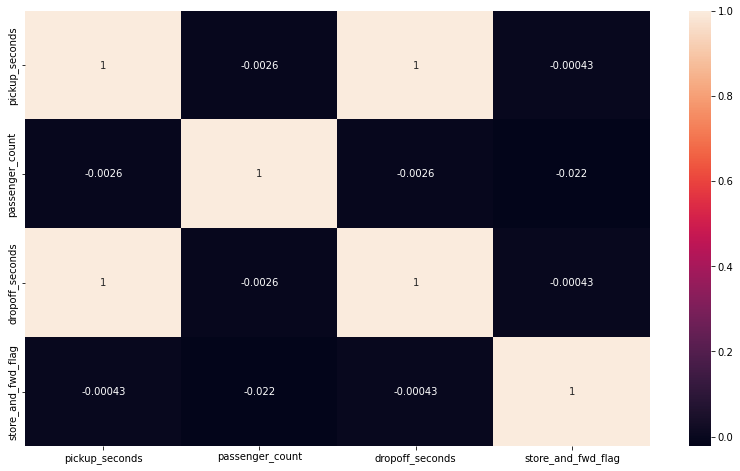

In [151]:
# Let's plot correlation heatmap between all the indpendent feature
plt.figure(figsize=(14,8))
sns.heatmap(x.corr(),annot=True)

        We are good to go!

In [133]:
#sample X
x.sample(3)

,pickup_seconds,passenger_count,dropoff_seconds,store_and_fwd_flag
646575,1.459813e+09,1,1.459813e+09,0
1000780,1.451995e+09,1,1.451996e+09,0
360855,1.465852e+09,1,1.465853e+09,0


In [134]:
# normalization of data
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

# scale x
scaled_x=scaler.fit_transform(x)

#scale y
scaled_y=np.sqrt(y)

In [135]:
# traintest split
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(scaled_x,scaled_y,test_size=0.2,random_state=0)

# Applying Linear Model


In [136]:
from sklearn.linear_model import LinearRegression
linear_model=LinearRegression()

linear_model.fit(x_train,y_train)

LinearRegression()

In [137]:
test_preds=linear_model.predict(x_test)
train_preds=linear_model.predict(x_train)

# Model Evaluation 

In [ ]:
# for training set
print('MSE :{}'.format(mean_squared_error(y_train,train_preds)))
print('MAE :{}'.format(mean_absolute_error(y_train,train_preds)))

print('R2_Score :{}'.format(r2_score(y_train,train_preds)))

MSE :2.3726881946601974
MAE :1.15697981068133
R2_Score :0.965456844263614


      Simple Linear Regression model has performed very well on train data,
      let's check on test data 

In [ ]:
# for test set
print('MSE :{}'.format(mean_squared_error(y_test,test_preds)))
print('MAE :{}'.format(mean_absolute_error(y_test,test_preds)))

print('R2_Score :{}'.format(r2_score(y_test,test_preds)))

MSE :2.39886435749454
MAE :1.159442748845324
R2_Score :0.9650570392662163


      In test data also ,model has performed very well